In [1]:
from IPython.core.display import HTML as Center

Center(
""" 
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
        
    }
</style> 
""")

$
\newcommand{\nc}{\newcommand} 
\nc{\t}{\text}
\nc{\tb}{\textbf}
\nc{\ti}{\textit}
\nc{\x}{\boldsymbol{x}}
\nc{\y}{\boldsymbol{y}}
\nc{\z}{\boldsymbol{z}}
$

# $$\textbf{Python Programming for Machine Learning} $$ 

## $$\t{Simulation of Markov chains, Code compilation, Clustering}$$

#### $$\text{Winter Semester 2021/2022}$$

#### $$\text{Sergej Dogadov and Panagiotis Tomer Karagianis}$$

<center>
<img src='images/pyt.png' width=250>

## $$\textbf{Markov chains}$$
<hr>

* $\text{Markov chain transits between a set of states, where the transition between pairs of states}$

$\quad\quad\quad\text{is associated with a fixed probability.}$

* $\text{The set of probabilities can be stored in a transition matrix.}$

<center>
    <img src='./images/markov.png', width='1000'>

## $$\textbf{ Transition matrix and initial states}$$
<hr>

In [2]:
import numpy as np

# Transition matrix
T = np.array([
                [0.2, 0.1, 0.7], # transition from state 1 to state 1,2,3
                [0.0, 0.5, 0.5], # transition from state 2 to state 1,2,3
                [0.9, 0.0, 0.1], # transition from state 3 to state 1,2,3
            ])

In [3]:
# Add empty state to transition matrix

pad_shape = ( (0, 0), (1, 0) )  # ((before_1, after_1), (before_2, after_2))

P = np.pad(T, pad_shape, mode='constant', constant_values=0) 
print(P)

#np.pad(T, pad_shape, mode='mean') # diff modes available like: mean, empty, func, etc

[[0.  0.2 0.1 0.7]
 [0.  0.  0.5 0.5]
 [0.  0.9 0.  0.1]]


In [4]:
# Init tokens to start at the node 0
num_tokens = 4

starting_constellation = [1, 0, 0]

# explicit repetition
X = np.tile(starting_constellation, reps=(num_tokens,1)) 

# implicit by broadcasting:
#X = np.outer(num_tokens*[1], starting_constellation) # (4,) x (3,) -> (4,3)
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

## $$\textbf{ Markov chain step }$$
<hr> 

In [5]:
def mc_step(X, P, verbose=False):
    
    # (4,3) x (3, 4)
    Xp = X @ P # one mc step 
    
    Xc = np.cumsum(Xp, axis=1)
    
    log = f'Xp:\n{Xp}\n\nXc:\n{Xc}\n\n'
    
    L, H = Xc[:, :-1], Xc[:, 1:] # lower and upper bounds
    
    log += f'L:\n{L}\n\nH:\n{H}\n'
    
    R = np.random.uniform(0, 1, (X.shape[0], 1)) # random state for each token
    
    log += f'\nR\n{R}\n'
    
    states = (R >= L) * (R < H) #equiv: np.logical_and((R > L), (R < H))
    
    log += f'\nNew states:\n{states.astype(np.int)}'
    
    if verbose:
        print(log)
        
    return states.astype('int32')


## $$\textbf{ Markov chain step cont'd}$$
<hr>

In [6]:
X = mc_step(X, P, 
        verbose=True);

Xp:
[[0.  0.2 0.1 0.7]
 [0.  0.2 0.1 0.7]
 [0.  0.2 0.1 0.7]
 [0.  0.2 0.1 0.7]]

Xc:
[[0.  0.2 0.3 1. ]
 [0.  0.2 0.3 1. ]
 [0.  0.2 0.3 1. ]
 [0.  0.2 0.3 1. ]]

L:
[[0.  0.2 0.3]
 [0.  0.2 0.3]
 [0.  0.2 0.3]
 [0.  0.2 0.3]]

H:
[[0.2 0.3 1. ]
 [0.2 0.3 1. ]
 [0.2 0.3 1. ]
 [0.2 0.3 1. ]]

R
[[0.68531996]
 [0.2686948 ]
 [0.735292  ]
 [0.61347515]]

New states:
[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_2588/2412133906.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log += f'\nNew states:\n{states.astype(np.int)}'


## $$\textbf{ Simulate Markov process}$$
<hr> 

In [7]:
from tqdm import tqdm

def simulate(X, P, num_steps=2000, verbose=False):

    for i in tqdm(range(num_steps)):
        
        X = mc_step(X, P, verbose)
        
        if verbose:
            print(str(X)+'\n')

    return X.mean(axis=0) # represents a prob of token to be in one of the Markov chain states


In [8]:
simulate(X, P)

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_2588/2412133906.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log += f'\nNew states:\n{states.astype(np.int)}'
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1075.45it/s]


array([0.75, 0.  , 0.25])

# $$\textbf{Python code compilation}$$
<hr>

<br><br>
<center>
    <img src='./images/comp.png' width='300'>

## $$\textbf{Making pure Python faster}$$
<hr> 

In [9]:
import math

def is_prime(num):
    
    if num == 2:
        return True
    
    if num <= 1 or num % 2 == 0:
        return False
    
    for div in range(3, int(math.sqrt(num)) + 1, 2): # for 173 -> [3, 5, 7, 9, 11, 13] 
        #print(div)
        if num % div == 0:
            return False
        
    return True
    

In [10]:
is_prime(173)

True

In [11]:
def check_numbers(max_num, verbose=True):
    
    for num in range(0, max_num):
        res = is_prime(num)
        if verbose:
            print(f'{num} -> {res}')
            

In [12]:
check_numbers(25)

0 -> False
1 -> False
2 -> True
3 -> True
4 -> False
5 -> True
6 -> False
7 -> True
8 -> False
9 -> False
10 -> False
11 -> True
12 -> False
13 -> True
14 -> False
15 -> False
16 -> False
17 -> True
18 -> False
19 -> True
20 -> False
21 -> False
22 -> False
23 -> True
24 -> False


## $$\textbf{Benchmark function}$$

In [13]:
from time import time

def benchmark(fn, args=()):
    st = time()
    fn(*args)
    return f'Elapsed time: {(time() - st):0.6f}'

In [14]:
benchmark(check_numbers, args=(1000000, False))

'Elapsed time: 2.591859'

## $$\textbf{A high performance Python compiler}$$
<hr>
<br><br>

<center>
    <img src='./images/numba.png' width='400'>

* $\text{Add an automatic compiler}$

In [15]:
# conda -c conda-forge numba

from numba import njit, prange

@njit(fastmath=True)
def is_prime(num):
    
    if num == 2:
        return True
    
    if num <= 1 or num % 2 == 0:
        return False
    
    for div in range(3, int(math.sqrt(num)) + 1, 2):
        if num % div == 0:
            return False
        
    return True

In [16]:
@njit(fastmath=True)
def check_numbers(max_num):
    for num in range(max_num):
        res = is_prime(num)

In [17]:
benchmark(check_numbers, args=(1000000, ))


'Elapsed time: 0.597167'

## $$\textbf{ Cython}$$
<hr> 

* $\text{Cython is a static compiler for Python programming language}$
<br><br>

<center>
    <img src='./images/cython.png' width='400'>

In [18]:
# conda install -c anaconda cython

import cython

%load_ext cython


In [19]:
%%cython

#cython: boundscheck=False, wraparound=False, cdivision=True, nonecheck=False

import numpy as np
cimport numpy as np
cimport cython

cdef float[:,:] fill_(int n, float fill_value):
    
    cdef:
        int i
        float[:,:] outs = np.empty((n,n), dtype = np.float32)
    
    for i in range(n):
        for j in range(n):   
            outs[i,j] = fill_value

    return outs


cpdef np.ndarray cdot(float[:,:] X, float[:,:] Y): 
    
    n = len(X)
    cdef:
        int i,j
        float[:,:] Z = fill_(n, 0.)    
    

    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i,j] += X[i, k] * Y[k, j]
    
    return np.array(Z)


DistutilsPlatformError: Unable to find vcvarsall.bat

In [20]:
import numpy as np
cimport numpy as np
cimport cython

SyntaxError: invalid syntax (Temp/ipykernel_2588/213057435.py, line 2)

## $$\textbf{ Measure the performance }$$
<hr> 

In [21]:
n = 500
X = np.random.normal(0,1, size=(n,n)).astype(np.float32)
X.shape, X.dtype

benchmark(cdot, args=(X,X))


NameError: name 'cdot' is not defined

In [22]:
%timeit -n 5 -r 3 cdot(X,X)

NameError: name 'cdot' is not defined

In [23]:
f = lambda X: X @ X 

In [24]:
%timeit -n 5 -r 3 f(X)

2.14 ms ± 1.02 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


## $$\textbf{ Clustering}$$
<hr> 

In [25]:
from sklearn.datasets import make_blobs
import sklearn

X, true_y, true_means = make_blobs(n_samples=250, 
                       centers=3, 
                       n_features=2, cluster_std=3, 
                       random_state=42, return_centers=True)

sklearn.__version__

'1.0.1'

In [26]:
import matplotlib.pyplot as plt

def plot_clusters(X, y, means, title=''):

    fig = plt.figure(figsize=(8, 8))
    colors = ['r', 'g', 'b']
    
    for n, mu in enumerate(means):
        idx = y == n
        plt.scatter(*X[idx].T, label=f'$\mu_{n}$:' + f'[{mu[0]:0.1f}, {mu[1]:0.1f}]')
        
        if mu is not None:
            plt.plot(*mu, 'X', color='r', markersize=12)
    
    plt.title(title, fontsize=20)
    plt.legend(loc=4, fontsize=12);

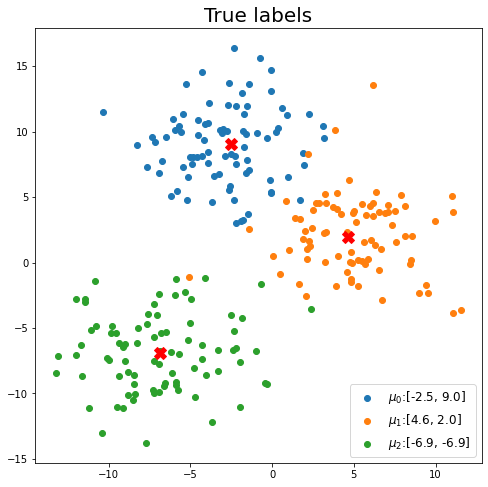

In [27]:
plot_clusters(X, true_y, true_means, 'True labels')


## $$k\textbf{-means Clustering}$$
<hr> 

* $\t{Initialize means and labels}$

In [28]:
n_means = 2

means = np.random.normal(0, 5, size=(n_means, 2))
labels = np.zeros(len(X))


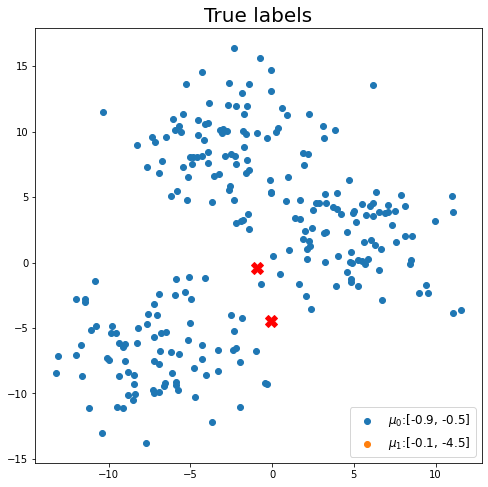

In [29]:
plot_clusters(X, labels, means, 'True labels')


* $\t{Compute distances to all means}$

In [30]:
#   N,1,d    1, K,d
D = np.sum((X[:, None] - means[None])**2, 2) ** 0.5 # cdist sklearn 

D.shape


(250, 2)

* $\t{Assign label by the min distance}$

In [31]:
labels = np.argmin(D, axis=1)
labels[:10]


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

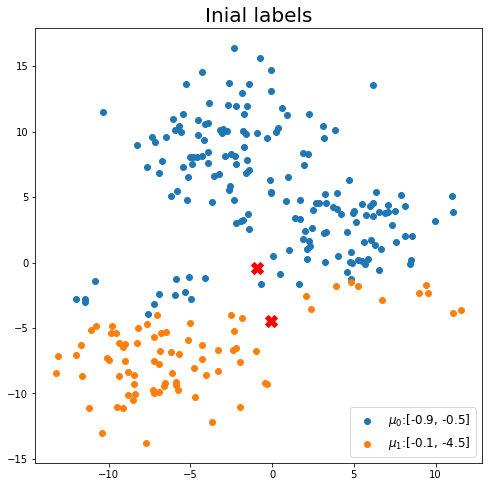

In [32]:
plot_clusters(X, labels, means, 'Inial labels')


* $\t{Recompute means}$

In [33]:
def recompute_means(X, labels):
    
    unq_labels = np.unique(labels)
    
    mus = []
    
    for label in unq_labels:
        
        idx = labels == label
        mean = np.mean(X[idx], axis=0)
        mus += [mean]
        
    mus = np.concatenate(mus).reshape(-1, 2)
    
    return mus

In [34]:
means = recompute_means(X, labels)
means

array([[ 0.0268463 ,  5.43831882],
       [-5.06734511, -7.0472139 ]])

* $\t{Iterate the process}$

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 44.86it/s]


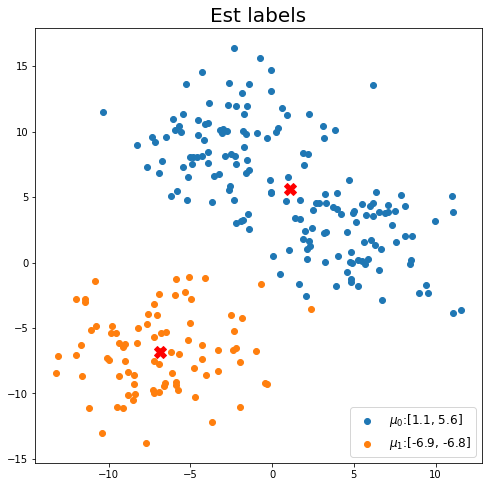

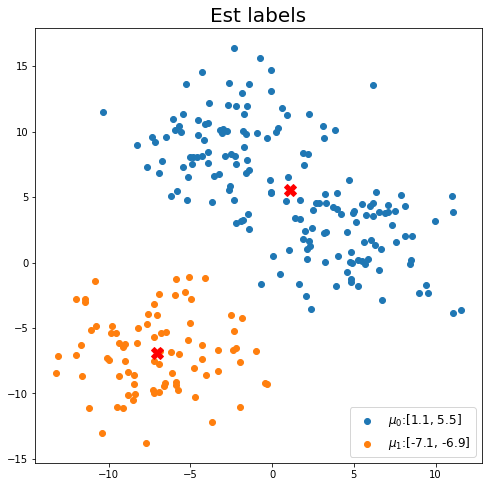

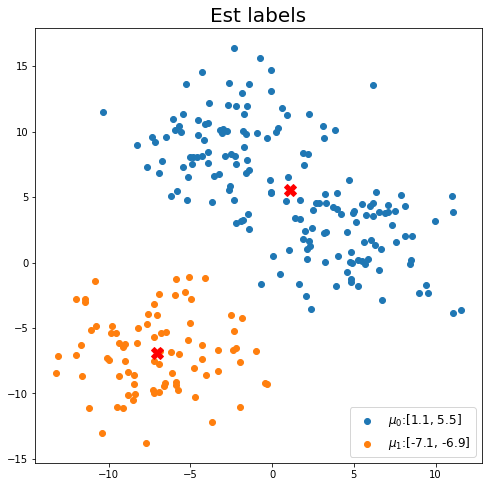

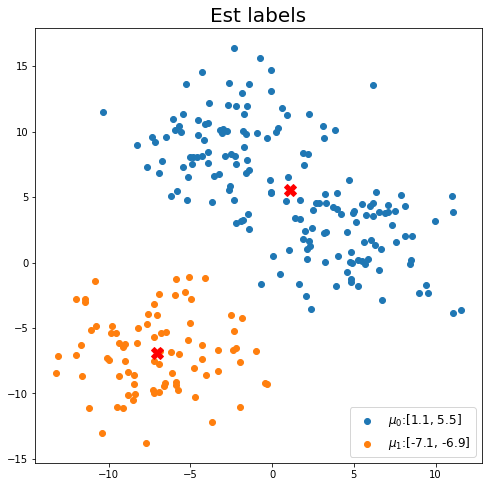

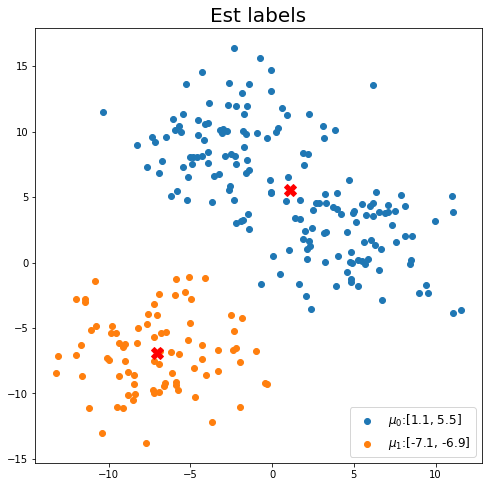

In [35]:
from tqdm import tqdm 

n_epochs = 5

for epoch in tqdm(np.arange(n_epochs)):
    
    D = np.sum((X[:,None] - means[None])**2, 2) ** 0.5 
    labels = np.argmin(D, axis=1)
    means = recompute_means(X, labels)
    
    plot_clusters(X, labels, means, 'Est labels')
    

## $$\textbf{ Mixture of Gaussians }$$

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=33432).fit(X)

pred_means = gmm.means_

pred_labels = gmm.predict(X)


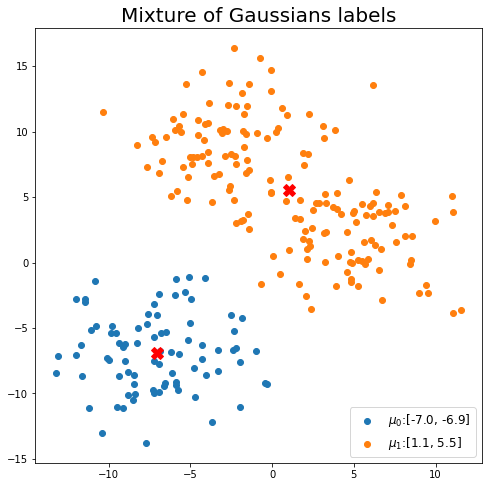

In [37]:
plot_clusters(X, pred_labels, pred_means, 'Mixture of Gaussians labels')

## $$\textbf{ Thank you for your attention }$$